# Média Móvel Simples (MMS) ou Simple Moving Average (SMA)
## TAIL - Technology and Artificial Intelligence League

---

Definição e visualização de Média Móvel Simples com dados do Ministério da Saúde relacionados a COVID-19 por Larissa Lucena.


Existem vários tipos de média móvel, a mais comum e fácil de entender é a simples e como o nome já diz, é uma média que se movimenta, ou seja, varia ao longo dos dados. A MMS consiste na média de n elementos, sendo n o período — anterior, posterior ou ambosos dois — que será considerado, aplicada a cada elemento do conjunto. 


Por exemplo, sendo n = 3:

A média do período anterior de x é a média dos 2 valores anteriores (a & b) a x e o próprio x ( a b x ).

Do perído posterior é a média dos 2 valores posteriores (d & e) a x e o próprio x ( x d e ).

E de ambos, o valor anterior (b), o valor posterior (d) e n ( b x d ).


A aplicação de média móvel permite uma visualização mais homogênea de dados com muitas oscilações/variações/ruídos, pois o histórico é levado em conta e não apenas um único valor. Os dados da COVID-19 são bons para exemplificar, uma vez que eles podem variar somente por ser ou não fim de semana, o que pode causar enganos quanto a progressão da pandemia. Sendo assim, média móveis ajudam a entender melhor as tendência dos dados.


Os dados são do Ministério da Saúde disponíveis em https://covid.saude.gov.br/.


In [67]:
# Leitura dos dados
import pandas as pd
covidBR = pd.read_csv('HIST_PAINEL_COVIDBR_20out2020.csv', sep=';')

# Descrição
covidBR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169620 entries, 0 to 1169619
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   regiao                  1169620 non-null  object 
 1   estado                  1169381 non-null  object 
 2   municipio               1158560 non-null  object 
 3   coduf                   1169620 non-null  int64  
 4   codmun                  1162928 non-null  float64
 5   codRegiaoSaude          1158560 non-null  float64
 6   nomeRegiaoSaude         1158560 non-null  object 
 7   data                    1169620 non-null  object 
 8   semanaEpi               1169620 non-null  int64  
 9   populacaoTCU2019        1165252 non-null  float64
 10  casosAcumulado          1169620 non-null  int64  
 11  casosNovos              1169620 non-null  int64  
 12  obitosAcumulado         1169620 non-null  int64  
 13  obitosNovos             1169620 non-null  int64  
 14  Re

- Vamos analisar o estado da Paraíba:

In [68]:
# Separar Paraíba
coronaPB = covidBR.loc[(covidBR['estado'] == 'PB') & covidBR['codmun'].isnull()]
coronaPB = coronaPB.drop(axis=1, columns=['regiao', 'estado', 'municipio', 'coduf', 'codmun', 'codRegiaoSaude', 'nomeRegiaoSaude', 
                                          'populacaoTCU2019', 'Recuperadosnovos', 'emAcompanhamentoNovos', 'interior/metropolitana'])
coronaPB.reset_index(drop=True, inplace=True)

In [69]:
# Colocar início dos meses no eixo X
datas = ['2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01']
meses = ['Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro']
mesesRes = ['Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out']
indices = []

for x1, e1 in enumerate(coronaPB['data']):
  for x2, e2 in enumerate(datas):
    if e2 in e1:
      indices.append(x1)

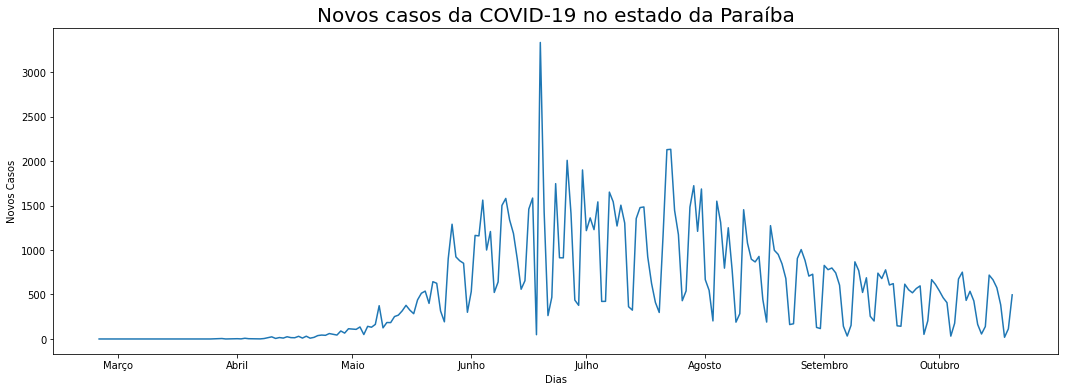

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(18,6))
plt.xticks(indices, meses)
plt.plot(coronaPB['data'], coronaPB['casosNovos'])
plt.title('Novos casos da COVID-19 no estado da Paraíba', fontsize=20)
plt.xlabel('Dias')
plt.ylabel('Novos Casos')
plt.show()

Podemos observar claramente aquelas oscilações dos dados ao longo dos meses. 
- Vamos começar definindo e aplicando a média móvel simples anterior:

## Anterior:
```
df.MMSA_coln[0] = NaN
[...]
df.MMSA_coln[n-1] = NaN
df.MMSA_coln[n] = (x[0] + x[1] + ... + x[n]) / n
df.MMSA_coln[n+1] = (x[1] + x[2] + ... + x[n+1]) / n
df.MMSA_coln[n+2] = (x[2] + x[3] + ... + x[n+2]) / n
[...]
df.MMSA_coln[tamanho de df - 1] = (x[tamanho de df - n] + x[tamanho de df - n + 1] + ... + x[tamanho de df - 1]) / n
```

In [71]:
import numpy as np

def mediaMovelAnterior(df, col, periodo):

  for x, e in enumerate(df[col]):

    if x+1 < periodo:
      df.loc[x, ('MMSA_' + col + str(periodo))] = None

    else:
      df.loc[x, ('MMSA_' + col + str(periodo))] = np.mean(df[col][x+1-periodo:x+1])

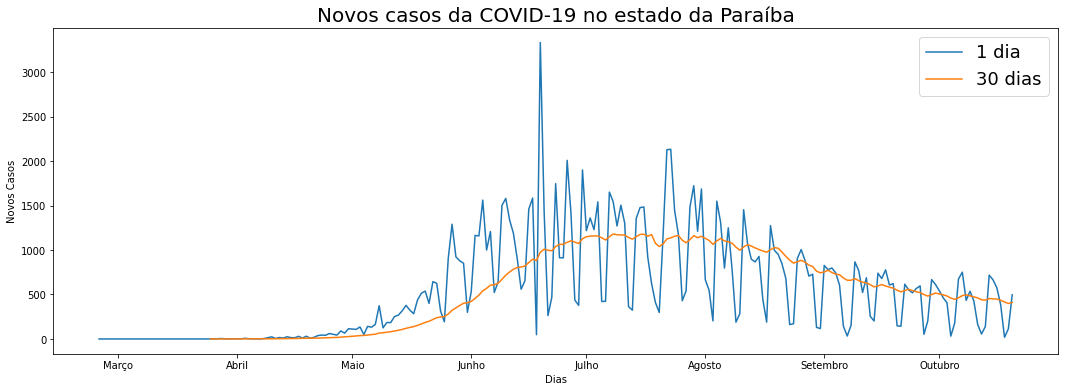

In [72]:
mediaMovelAnterior(coronaPB, 'casosNovos', 30)

plt.figure(figsize=(18,6))
plt.xticks(indices, meses)
plt.plot(coronaPB['data'], coronaPB['casosNovos'], label='1 dia')
plt.plot(coronaPB['data'], coronaPB['MMSA_casosNovos30'], label='30 dias')
plt.title('Novos casos da COVID-19 no estado da Paraíba', fontsize=20)
plt.xlabel('Dias')
plt.ylabel('Novos Casos')
plt.legend(fontsize=18)
plt.show()

Nota-se a melhor visualização que a média móvel proporciona, vemos também que ele está deslocado para a direita, ou seja, a MMSA apresenta um atraso temporal no acontecimento dos fatos ao visualizarmos em um gráfico. Na MMSP veremos o efeito contrário, um adiantamento, pois estará deslocado para a esquerda. Sendo o uso de MMSAP, uma alternativa melhor para visualização no tempo. Dessa forma, a escolha de qual dos três usar, dependerá do estudo que está sendo realizado, mas a essência é a mesma. 

- A definação da 'posterior' e da 'posterior e anterior' seguem a mesma lógica da anterior, variando as posições:

## Posterior:
```
df.MMSP_coln[0] = (x[0] + x[1] + ... + x[n]) / n
df.MMSP_coln[1] = (x[1] + x[2] + ... + x[n+1]) / n
[...]
df.MMSP_coln[tamanho de df - n] = (x[tamanho de df - n] + x[tamanho de df - n + 1] + ... + x[tamanho de df - 1]) / n
df.MMSP_coln[tamanho de df - n + 1] = NaN
df.MMSP_coln[tamanho de df - n + 2] = NaN
[...]
df.MMSP_coln[tamanho de df - 1] = NaN
```

In [73]:
def mediaMovelPosterior(df, col, periodo):

  for x, e in enumerate(df[col]):

    if len(df[col]) - x < periodo:
      df.loc[x, ('MMSP_' + col + str(periodo))] = None

    else:
      df.loc[x, ('MMSP_' + col + str(periodo))] = np.mean(df[col][x:x+periodo+1])

## Anterior e Posterior:
```
df.MMSA_coln[0] = NaN
[...]
df.MMSA_coln[(n-1) / 2] = NaN
df.MMSA_coln[((n-1) / 2) + 1] = (x[0] + x[1] + ... + x[(n-1) / 2] + ... + x[n-1] + x[n]) / n
df.MMSA_coln[((n-1) / 2) + 2] = (x[1] + x[2] + ... + x[((n-1) / 2) + 1] + ... + x[n] + x[n+1]) / n
[...]
df.MMSA_coln[tamanho de df - ((n-1) / 2) - 2] = (x[tamanho de df - 2((n-1) / 2 - 2] + ... + x[tamanho de df - ((n-1) / 2) - 2] + ... + x[tamanho de df - 2]) / n
df.MMSA_coln[tamanho de df - ((n-1) / 2) - 1] = (x[tamanho de df - 2((n-1) / 2 - 1] + ... + x[tamanho de df - ((n-1) / 2) - 1] + ... + x[tamanho de df - 1]) / n
df.MMSA_coln[tamanho de df - ((n-1) / 2)] = NaN
[...]
df.MMSA_coln[tamanho de df - 1] = NaN
```

In [74]:
def mediaMovelAntPost(df, col, periodo):

  p = int((periodo-1)/2)

  for x, e in enumerate(df[col]):

    if x < p or len(df[col]) - (x+1) < p:
      df.loc[x, ('MMSAP_' + col + str(periodo))] = None

    else:
      df.loc[x, ('MMSAP_' + col + str(periodo))] = np.mean(df[col][x-p:x-p+periodo])

- Aplicando os três tipos com período de 2 meses, temos:

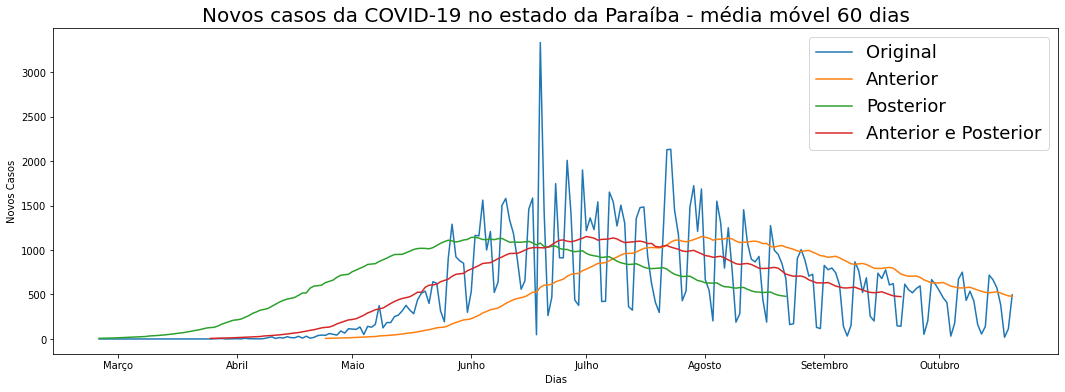

In [75]:
mediaMovelAnterior(coronaPB, 'casosNovos', 60)
mediaMovelPosterior(coronaPB, 'casosNovos', 60)
mediaMovelAntPost(coronaPB, 'casosNovos', 60)

plt.figure(figsize=(18,6))
plt.xticks(indices, meses)
plt.plot(coronaPB['data'], coronaPB['casosNovos'], label='Original')
plt.plot(coronaPB['data'], coronaPB['MMSA_casosNovos60'], label='Anterior')
plt.plot(coronaPB['data'], coronaPB['MMSP_casosNovos60'], label='Posterior')
plt.plot(coronaPB['data'], coronaPB['MMSAP_casosNovos60'], label='Anterior e Posterior')
plt.title('Novos casos da COVID-19 no estado da Paraíba - média móvel 60 dias', fontsize=20)
plt.xlabel('Dias')
plt.ylabel('Novos Casos')
plt.legend(fontsize=18)
plt.show()

- Comparando diferentes períodos de novos casos e registros de óbitos usando 'anterior e posterior':

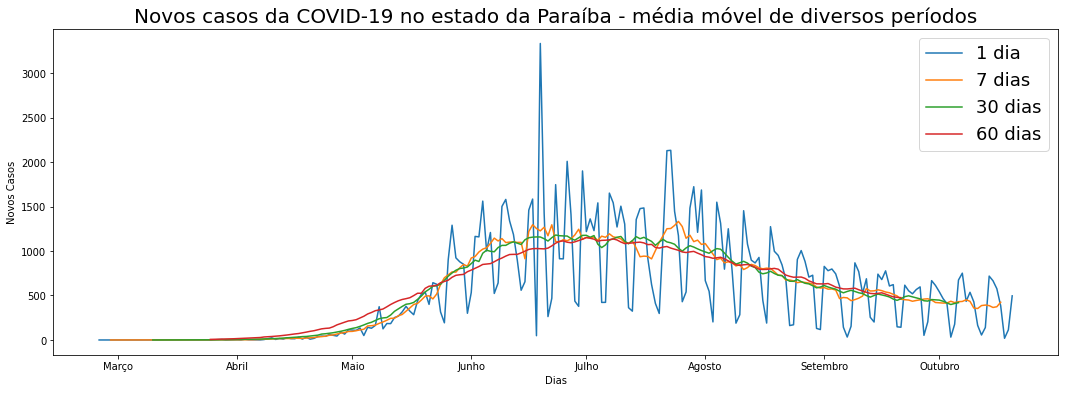

In [76]:
mediaMovelAntPost(coronaPB, 'casosNovos', 7)
mediaMovelAntPost(coronaPB, 'casosNovos', 30)
mediaMovelAntPost(coronaPB, 'casosNovos', 60)

plt.figure(figsize=(18,6))
plt.xticks(indices, meses)
plt.plot(coronaPB['data'], coronaPB['casosNovos'], label='1 dia')
plt.plot(coronaPB['data'], coronaPB['MMSAP_casosNovos7'], label='7 dias')
plt.plot(coronaPB['data'], coronaPB['MMSAP_casosNovos30'], label='30 dias')
plt.plot(coronaPB['data'], coronaPB['MMSAP_casosNovos60'], label='60 dias')
plt.title('Novos casos da COVID-19 no estado da Paraíba - média móvel de diversos períodos', fontsize=20)
plt.xlabel('Dias')
plt.ylabel('Novos Casos')
plt.legend(fontsize=18)
plt.show()

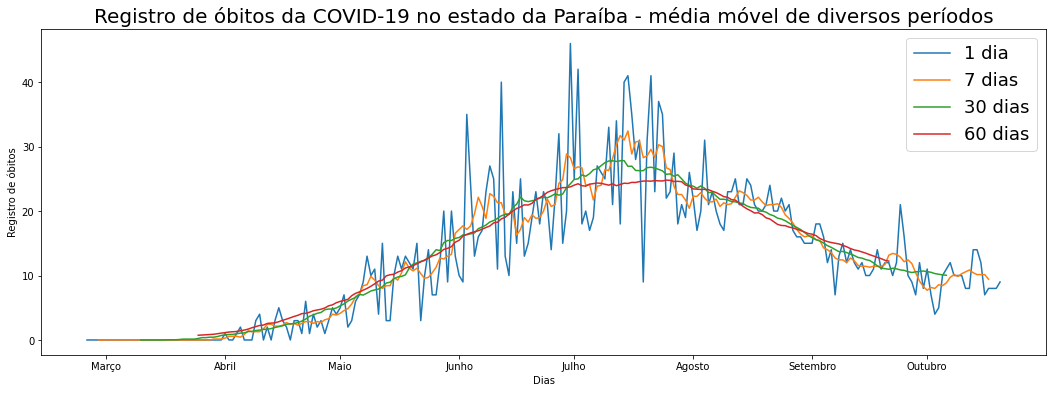

In [77]:
mediaMovelAntPost(coronaPB, 'obitosNovos', 7)
mediaMovelAntPost(coronaPB, 'obitosNovos', 30)
mediaMovelAntPost(coronaPB, 'obitosNovos', 60)

plt.figure(figsize=(18,6))
plt.xticks(indices, meses)
plt.plot(coronaPB.data, coronaPB.obitosNovos, label='1 dia')
plt.plot(coronaPB.data, coronaPB.MMSAP_obitosNovos7, label='7 dias')
plt.plot(coronaPB.data, coronaPB.MMSAP_obitosNovos30, label='30 dias')
plt.plot(coronaPB.data, coronaPB.MMSAP_obitosNovos60, label='60 dias')
plt.title('Registro de óbitos da COVID-19 no estado da Paraíba - média móvel de diversos períodos', fontsize=20)
plt.xlabel('Dias')
plt.ylabel('Registro de óbitos')
plt.legend(fontsize=18)
plt.show()

- Comparando novos casos e registros de óbitos dos estados do Nordeste por milhão de habitantes e usando média móvel simples 'anterior e posterior' com período de 30 dias:

In [ ]:
# Separar Nordeste
nordeste = covidBR.loc[(covidBR['regiao'] == 'Nordeste') & (covidBR['codmun'].isnull())]

# Estados por milhão de habitantes
nordeste.loc[:, 'casosMilhao'] = round((nordeste['casosNovos'] * 1000000) / nordeste['populacaoTCU2019'])
nordeste.loc[:, 'obitosMilhao'] = round((nordeste['obitosNovos'] * 1000000) / nordeste['populacaoTCU2019'])

nordeste.drop(columns=['municipio', 'codmun', 'codRegiaoSaude', 'nomeRegiaoSaude', 'semanaEpi', 'populacaoTCU2019', 
                     'casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos', 'Recuperadosnovos', 
                     'emAcompanhamentoNovos', 'interior/metropolitana'], inplace=True)

nordeste.reset_index(drop=True, inplace=True)

estados = nordeste['estado'].unique().tolist()
extenso = ['Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia']
guarda1 = []
guarda2 = []

# Media móvel correta (por estado, não de tudo)
for x, e in enumerate(estados):
  parcela = nordeste.loc[nordeste['estado'] == e]
  parcela.reset_index(drop=True, inplace=True)

  mediaMovelAntPost(parcela, 'casosMilhao', 30)
  mediaMovelAntPost(parcela, 'obitosMilhao', 30)

  guarda1.extend(parcela['MMSAP_casosMilhao30'].tolist())
  guarda2.extend(parcela['MMSAP_obitosMilhao30'].tolist())

nordeste.loc[:, 'MMSAP_casosMilhao30'] = guarda1
nordeste.loc[:, 'MMSAP_obitosMilhao30'] = guarda2

# Nomes estados sem sigla
for x1, e1 in enumerate(nordeste['estado']):
  for x2, e2 in enumerate(estados):
    if e1 == e2:
      nordeste.loc[x1, 'estado'] = e1.replace(e2, extenso[x2])

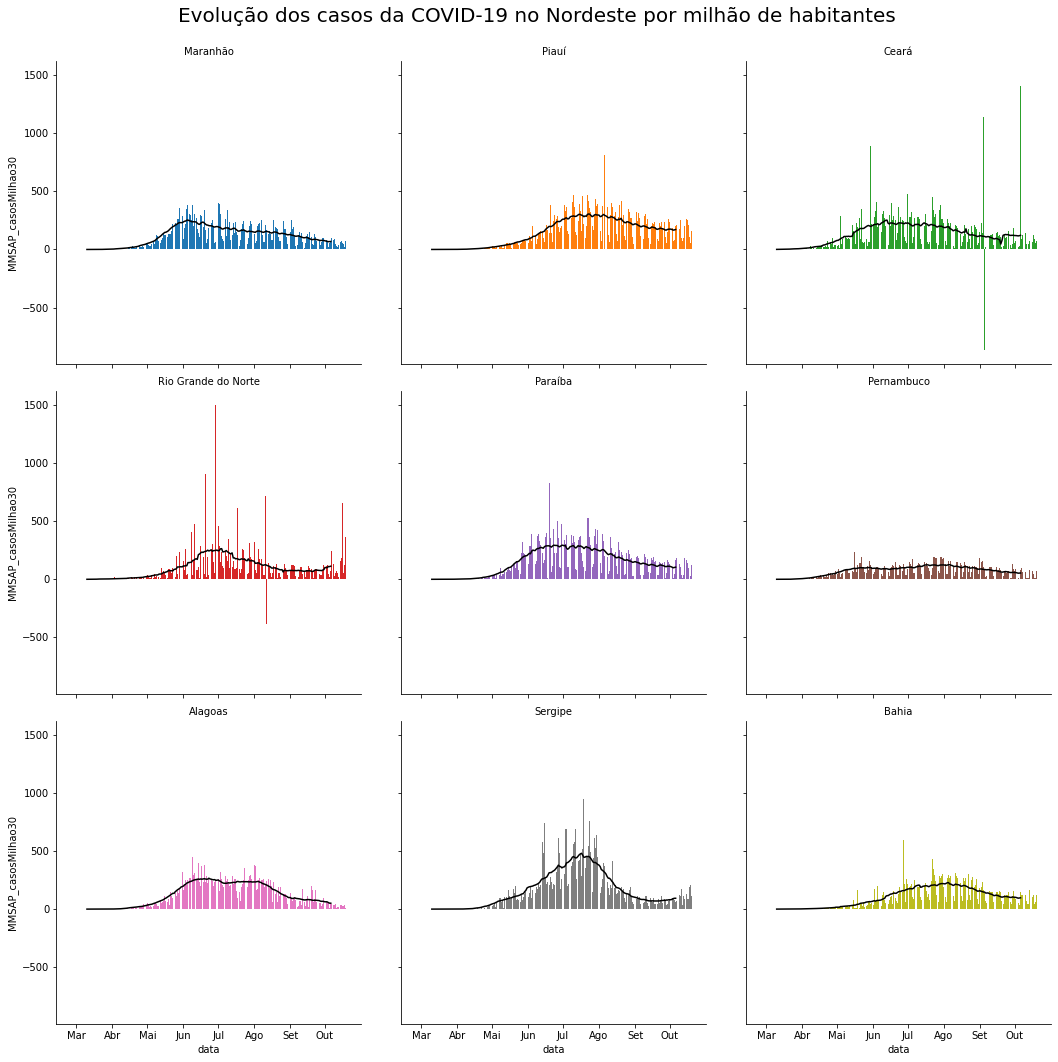

In [79]:
import seaborn as sns

grid = sns.FacetGrid(nordeste, col='estado', hue='estado', col_wrap=3, height=5)
grid.map(plt.bar, 'data', 'casosMilhao')
grid.map(plt.plot, 'data', 'MMSAP_casosMilhao30', color='k').set_titles('{col_name} estado')
grid.set_titles('{col_name}')
plt.xticks(indices, mesesRes)
plt.subplots_adjust(top=0.93)
grid.fig.suptitle('Evolução dos casos da COVID-19 no Nordeste por milhão de habitantes', fontsize=20)
plt.show()

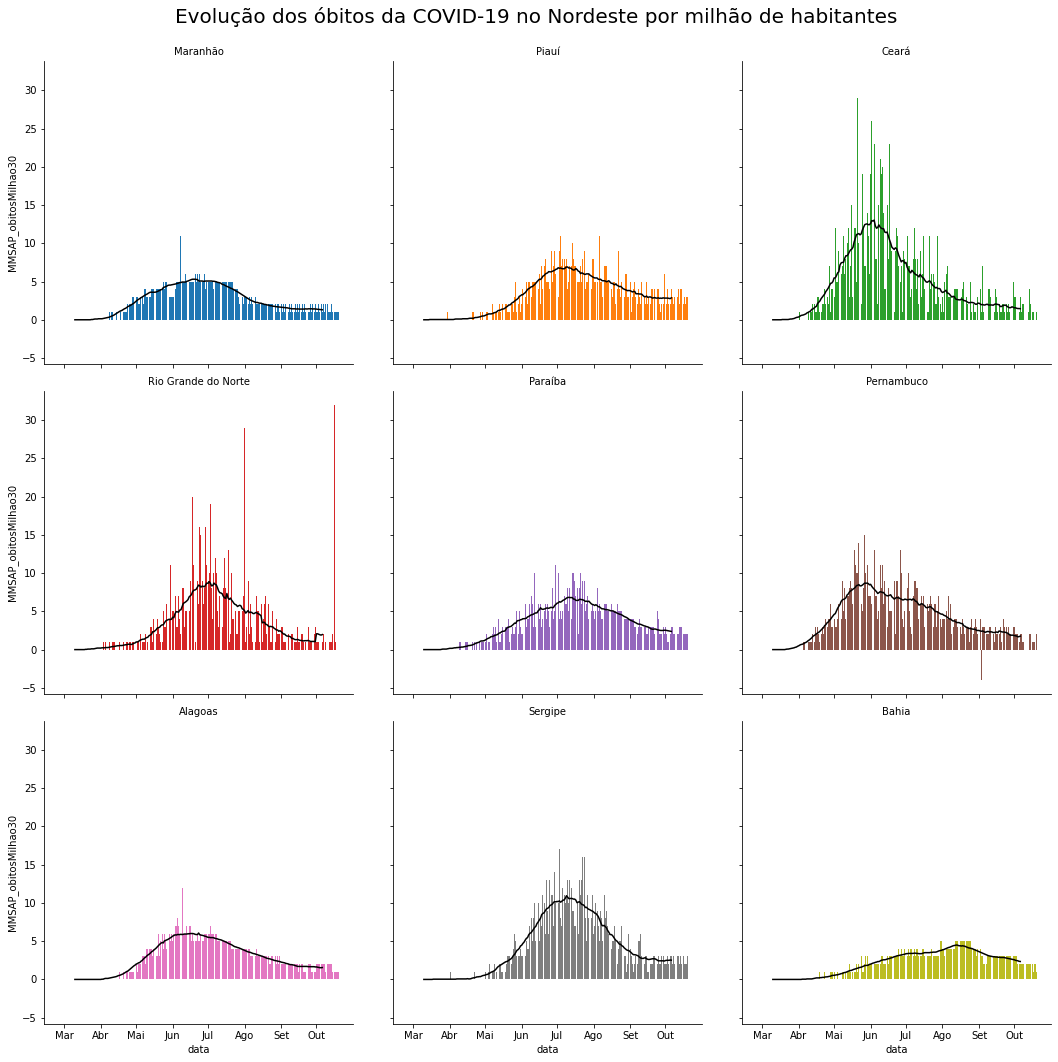

In [80]:
grid = sns.FacetGrid(nordeste, col='estado', hue='estado', col_wrap=3, height=5)
grid.map(plt.bar, 'data', 'obitosMilhao')
grid.map(plt.plot, 'data', 'MMSAP_obitosMilhao30', color='k').set_titles('{col_name} estado')
grid.set_titles('{col_name}')
plt.xticks(indices, mesesRes)
plt.subplots_adjust(top=0.93)
grid.fig.suptitle('Evolução dos óbitos da COVID-19 no Nordeste por milhão de habitantes', fontsize=20)
plt.show()